In [ ]:
! pip install numpy opencv-python

In [ ]:
! pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=f969582c11ded7bb8fa967d1de455d39a3891d8710fd73ae541d6bcfe8bd1666
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition as fr
import cv2
import numpy as np
import os

In [ ]:
!unzip /content/p2.zip -d pa


Archive:  /content/p2.zip
   creating: test/
  inflating: test/test.jpeg          
  inflating: __MACOSX/test/._test.jpeg  
   creating: train/
  inflating: train/amr.jpeg          
  inflating: __MACOSX/train/._amr.jpeg  
  inflating: train/hesham.jpeg       
  inflating: __MACOSX/train/._hesham.jpeg  
  inflating: train/Gad.jpeg          
  inflating: __MACOSX/train/._Gad.jpeg  
  inflating: train/waled.jpeg        
  inflating: __MACOSX/train/._waled.jpeg  
  inflating: train/abouzayed.jpeg    
  inflating: __MACOSX/train/._abouzayed.jpeg  
  inflating: train/zyad.jpeg         
  inflating: __MACOSX/train/._zyad.jpeg  


In [ ]:
path = "./train/"
known_names = []
known_name_encodings = []
images = os.listdir(path)

In [ ]:
for _ in images:
  image = fr.load_image_file(path + _)
  image_path = path + _
  encoding = fr.face_encodings(image)[0]
  known_name_encodings.append(encoding)
  known_names.append(os.path.splitext(os.path.basename(image_path))[0].capitalize())

In [ ]:
test_image = "/content/test/test.jpeg"
image = cv2.imread(test_image)

In [ ]:

face_locations = fr.face_locations(image)
face_encodings = fr.face_encodings(image, face_locations)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
   matches = fr.compare_faces(known_name_encodings, face_encoding)
   name = ""
   face_distances = fr.face_distance(known_name_encodings, face_encoding)
   best_match = np.argmin(face_distances)
   if matches[best_match]:
       name = known_names[best_match]
   cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
   cv2.rectangle(image, (left, bottom - 15), (right, bottom), (0, 0, 255), cv2.FILLED)
   font = cv2.FONT_HERSHEY_DUPLEX
   cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)


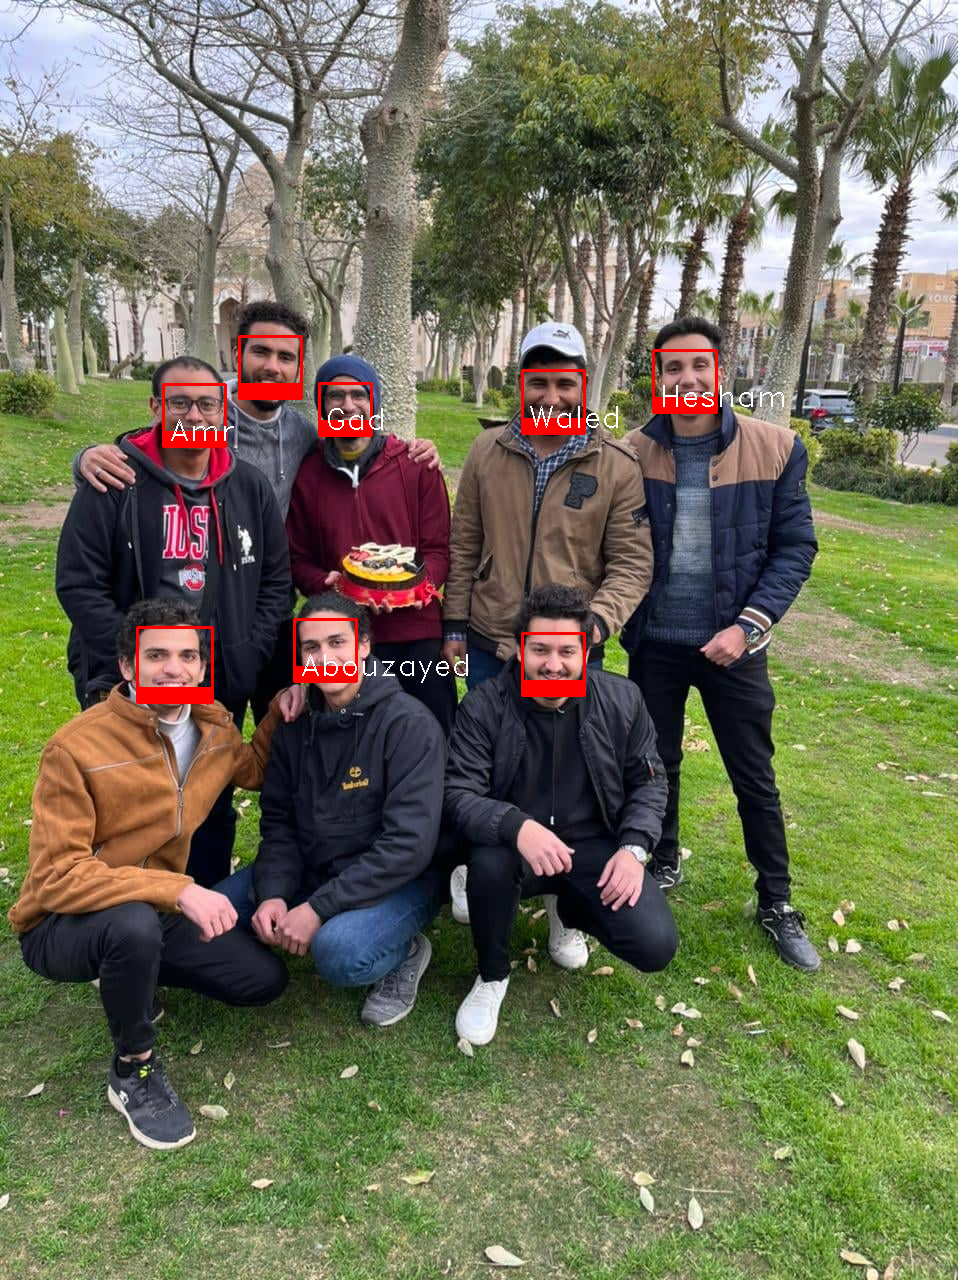

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow( image)